# Data Cleaning

This notebook is for data cleaning purposes.

**Other useful links:**
- <a href="https://github.com/schmitzmelissa/DSCT-Capstone01/blob/master/InitialDataExploration.ipynb">Initial Data Exploration</a>
- <a href="https://github.com/schmitzmelissa/DSCT-Capstone01">Full Github Repository</a>
- <a href="https://www.kaggle.com/footprintnetwork/ecological-footprint">Kaggle Dataset</a>
- <a href="https://www.footprintnetwork.org/">Data Source Website</a>
- <a href="https://www.footprintnetwork.org/resources/glossary/">Glossary of Relevant Terms</a>

## Imports and Creation of DataFrame from CSV

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Allows better display of DataFrames
from IPython.display import display

# Create DataFrame from CSV file
df = pd.read_csv('countries.csv')

In [3]:
pd.set_option('display.max_colwidth',1000)

# pd.set_option('display.max_columns',None)
# pd.set_option('display.max_rows',None)

In [4]:
df

,Country,Region,Population (millions),HDI,GDP per Capita,Cropland Footprint,Grazing Footprint,Forest Footprint,Carbon Footprint,Fish Footprint,...,Cropland,Grazing Land,Forest Land,Fishing Water,Urban Land,Total Biocapacity,Biocapacity Deficit or Reserve,Earths Required,Countries Required,Data Quality
0,Afghanistan,Middle East/Central Asia,29.820,0.460000,$614.66,0.30,0.20,0.08,0.18,0.00,...,0.24,0.20,0.02,0.00,0.04,0.50,-0.30,0.46,1.600000,6
1,Albania,Northern/Eastern Europe,3.160,0.730000,"$4,534.37",0.78,0.22,0.25,0.87,0.02,...,0.55,0.21,0.29,0.07,0.06,1.18,-1.03,1.27,1.870000,6
2,Algeria,Africa,38.480,0.730000,"$5,430.57",0.60,0.16,0.17,1.14,0.01,...,0.24,0.27,0.03,0.01,0.03,0.59,-1.53,1.22,3.610000,5
3,Angola,Africa,20.820,0.520000,"$4,665.91",0.33,0.15,0.12,0.20,0.09,...,0.20,1.42,0.64,0.26,0.04,2.55,1.61,0.54,0.370000,6
4,Antigua and Barbuda,Latin America,0.090,0.780000,"$13,205.10",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.94,-4.44,3.11,5.700000,2
5,Argentina,Latin America,41.090,0.830000,"$13,540.00",0.78,0.79,0.29,1.08,0.10,...,2.64,1.86,0.66,1.67,0.10,6.92,3.78,1.82,0.450000,6
6,Armenia,Middle East/Central Asia,2.970,0.730000,"$3,426.39",0.74,0.18,0.34,0.89,0.01,...,0.44,0.26,0.10,0.02,0.07,0.89,-1.35,1.29,2.520000,3B
7,Aruba,Latin America,0.100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.57,-11.31,6.86,20.690000,2
8,Australia,Asia-Pacific,23.050,0.930000,"$66,604.20",2.68,0.63,0.89,4.85,0.11,...,5.42,5.81,2.01,3.19,0.14,16.57,7.26,5.37,0.560000,5
9,Austria,European Union,8.460,0.880000,"$51,274.10",0.82,0.27,0.63,4.14,0.06,...,0.71,0.16,2.04,0.00,0.15,3.07,-3.00,3.50,1.980000,5


# Removing Missing Values

### Removal of rows with NaN in GDP per Capita
The data is from 2016 and I could not find another data source for GDP from 2016 to supplement the missing values. Every nation has a GDP, but if I have no other measure of financial prosperousness for a certain country, I cannot make predictions based on finances for that country.

This decision __removed 15 countries (8% of total data)__ from my dataset, as shown below.

Once the model is created, other parameters for these 15 countries could potentially be used to make predictions about these missing values, however (i.e, perhaps GDP per Capita could be predicted from other values with the model).

In [5]:
# Create a DF that does not include countries with empty GDP values
df_noGDP = df[pd.isnull(df['GDP per Capita']) == False]
df_noGDP

,Country,Region,Population (millions),HDI,GDP per Capita,Cropland Footprint,Grazing Footprint,Forest Footprint,Carbon Footprint,Fish Footprint,...,Cropland,Grazing Land,Forest Land,Fishing Water,Urban Land,Total Biocapacity,Biocapacity Deficit or Reserve,Earths Required,Countries Required,Data Quality
0,Afghanistan,Middle East/Central Asia,29.820,0.460000,$614.66,0.30,0.20,0.08,0.18,0.00,...,0.24,0.20,0.02,0.00,0.04,0.50,-0.30,0.46,1.600000,6
1,Albania,Northern/Eastern Europe,3.160,0.730000,"$4,534.37",0.78,0.22,0.25,0.87,0.02,...,0.55,0.21,0.29,0.07,0.06,1.18,-1.03,1.27,1.870000,6
2,Algeria,Africa,38.480,0.730000,"$5,430.57",0.60,0.16,0.17,1.14,0.01,...,0.24,0.27,0.03,0.01,0.03,0.59,-1.53,1.22,3.610000,5
3,Angola,Africa,20.820,0.520000,"$4,665.91",0.33,0.15,0.12,0.20,0.09,...,0.20,1.42,0.64,0.26,0.04,2.55,1.61,0.54,0.370000,6
4,Antigua and Barbuda,Latin America,0.090,0.780000,"$13,205.10",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.94,-4.44,3.11,5.700000,2
5,Argentina,Latin America,41.090,0.830000,"$13,540.00",0.78,0.79,0.29,1.08,0.10,...,2.64,1.86,0.66,1.67,0.10,6.92,3.78,1.82,0.450000,6
6,Armenia,Middle East/Central Asia,2.970,0.730000,"$3,426.39",0.74,0.18,0.34,0.89,0.01,...,0.44,0.26,0.10,0.02,0.07,0.89,-1.35,1.29,2.520000,3B
8,Australia,Asia-Pacific,23.050,0.930000,"$66,604.20",2.68,0.63,0.89,4.85,0.11,...,5.42,5.81,2.01,3.19,0.14,16.57,7.26,5.37,0.560000,5
9,Austria,European Union,8.460,0.880000,"$51,274.10",0.82,0.27,0.63,4.14,0.06,...,0.71,0.16,2.04,0.00,0.15,3.07,-3.00,3.50,1.980000,5
10,Azerbaijan,Middle East/Central Asia,9.310,0.750000,"$7,106.04",0.66,0.22,0.11,1.25,0.01,...,0.46,0.20,0.11,0.02,0.06,0.85,-1.46,1.33,2.720000,6


### Removal of rows that only have aggregate values for Total Footprint and Total Biocapacity
There are several countries that are missing all the footprint data and resource data except for the totals for footprints and biocapacity. If the model is to use aspects of the footprint (e.g., carbon emissions) or the biocapacity (e.g., forest land), then rows that contain NaN for that data should be omitted in order to create the model.

From manual inspection of the DataFrame, any column that was missing any one of the component footprints or resources was missing all of them. So this can be executed by removing rows via any of the missing columns.

This deicison __removed 10 countries (another 5% for 13% total reduction)__ from the dataset, as shown below.

After the model is created, the rows containing only total footprint and total biocapacity (the sum rather than the parts) may be added in to create predictions for those countries.

In [6]:
# Create a DF that does not include countries with empty values for component footprints or resources
df_noFandR = df_noGDP[pd.isnull(df_noGDP['Cropland']) == False]

df_noFandR

,Country,Region,Population (millions),HDI,GDP per Capita,Cropland Footprint,Grazing Footprint,Forest Footprint,Carbon Footprint,Fish Footprint,...,Cropland,Grazing Land,Forest Land,Fishing Water,Urban Land,Total Biocapacity,Biocapacity Deficit or Reserve,Earths Required,Countries Required,Data Quality
0,Afghanistan,Middle East/Central Asia,29.820,0.460000,$614.66,0.30,0.20,0.08,0.18,0.00,...,0.24,0.20,0.02,0.00,0.04,0.50,-0.30,0.46,1.600000,6
1,Albania,Northern/Eastern Europe,3.160,0.730000,"$4,534.37",0.78,0.22,0.25,0.87,0.02,...,0.55,0.21,0.29,0.07,0.06,1.18,-1.03,1.27,1.870000,6
2,Algeria,Africa,38.480,0.730000,"$5,430.57",0.60,0.16,0.17,1.14,0.01,...,0.24,0.27,0.03,0.01,0.03,0.59,-1.53,1.22,3.610000,5
3,Angola,Africa,20.820,0.520000,"$4,665.91",0.33,0.15,0.12,0.20,0.09,...,0.20,1.42,0.64,0.26,0.04,2.55,1.61,0.54,0.370000,6
5,Argentina,Latin America,41.090,0.830000,"$13,540.00",0.78,0.79,0.29,1.08,0.10,...,2.64,1.86,0.66,1.67,0.10,6.92,3.78,1.82,0.450000,6
6,Armenia,Middle East/Central Asia,2.970,0.730000,"$3,426.39",0.74,0.18,0.34,0.89,0.01,...,0.44,0.26,0.10,0.02,0.07,0.89,-1.35,1.29,2.520000,3B
8,Australia,Asia-Pacific,23.050,0.930000,"$66,604.20",2.68,0.63,0.89,4.85,0.11,...,5.42,5.81,2.01,3.19,0.14,16.57,7.26,5.37,0.560000,5
9,Austria,European Union,8.460,0.880000,"$51,274.10",0.82,0.27,0.63,4.14,0.06,...,0.71,0.16,2.04,0.00,0.15,3.07,-3.00,3.50,1.980000,5
10,Azerbaijan,Middle East/Central Asia,9.310,0.750000,"$7,106.04",0.66,0.22,0.11,1.25,0.01,...,0.46,0.20,0.11,0.02,0.06,0.85,-1.46,1.33,2.720000,6
11,Bahamas,Latin America,0.370,0.780000,"$22,647.30",0.97,1.05,0.19,4.46,0.14,...,0.05,0.00,1.18,8.27,0.04,9.55,2.71,3.95,0.720000,3L


In [7]:
# Save DF with NaN values removed to a separate csv file
# df_noFandR.to_csv('countries_cleanedNaNs.csv')

In [8]:
# Save original DataFrame
df_original = df

# Rename current working DataFrame
df = df_noFandR

## Removal of NaN Values Complete
At this point there are no more NaN values, creating a dataset with 87% of the original data left intact.

However, one dubious row is Data Quality, for which I have yet to find a proper explanation for (see <a href="https://www.kaggle.com/footprintnetwork/ecological-footprint/discussion/74703">this Kaggle discussion</a> for updates). This lack of data might impact the integrity of the final model if results cannot be weighted by data quality.

# Cleaning non-NaN Values

### Removing Unnecessary Symbols: $

In [9]:
# Remove $ and , from GDP per Capita column
df['GDP per Capita'] = df['GDP per Capita'].str.replace('$', '')
df['GDP per Capita'] = df['GDP per Capita'].str.replace(',', '')

# Convert to float
df['GDP per Capita'] = df['GDP per Capita'].astype(float)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

In [10]:
# Display modified DataFrame with float values
df.head(5)

,Country,Region,Population (millions),HDI,GDP per Capita,Cropland Footprint,Grazing Footprint,Forest Footprint,Carbon Footprint,Fish Footprint,...,Cropland,Grazing Land,Forest Land,Fishing Water,Urban Land,Total Biocapacity,Biocapacity Deficit or Reserve,Earths Required,Countries Required,Data Quality
0,Afghanistan,Middle East/Central Asia,29.82,0.46,614.66,0.30,0.20,0.08,0.18,0.00,...,0.24,0.20,0.02,0.00,0.04,0.50,-0.30,0.46,1.60,6
1,Albania,Northern/Eastern Europe,3.16,0.73,4534.37,0.78,0.22,0.25,0.87,0.02,...,0.55,0.21,0.29,0.07,0.06,1.18,-1.03,1.27,1.87,6
2,Algeria,Africa,38.48,0.73,5430.57,0.60,0.16,0.17,1.14,0.01,...,0.24,0.27,0.03,0.01,0.03,0.59,-1.53,1.22,3.61,5
3,Angola,Africa,20.82,0.52,4665.91,0.33,0.15,0.12,0.20,0.09,...,0.20,1.42,0.64,0.26,0.04,2.55,1.61,0.54,0.37,6
5,Argentina,Latin America,41.09,0.83,13540.00,0.78,0.79,0.29,1.08,0.10,...,2.64,1.86,0.66,1.67,0.10,6.92,3.78,1.82,0.45,6


In [11]:
# Print head to see stripped values and data type
print(df['GDP per Capita'].head())

0      614.66
1     4534.37
2     5430.57
3     4665.91
5    13540.00
Name: GDP per Capita, dtype: float64


### Simplify region names

In [12]:
# First find all the options
df['Region'].value_counts()

Africa                      48
Latin America               29
Asia-Pacific                27
European Union              24
Middle East/Central Asia    22
Northern/Eastern Europe     11
North America                2
Name: Region, dtype: int64

### GDP per Capita

In [13]:
type(df['Cropland Footprint'][0])

numpy.float64

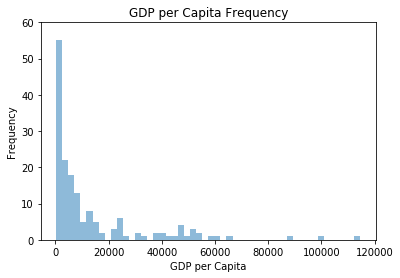

In [19]:
plt.hist(df['GDP per Capita'], bins=50, alpha=0.5)
plt.title('GDP per Capita Frequency')
plt.xlabel('GDP per Capita')
plt.ylabel('Frequency')
plt.ylim(0,60)

plt.show()

In [15]:
df['GDP per Capita'].max()

114665.0

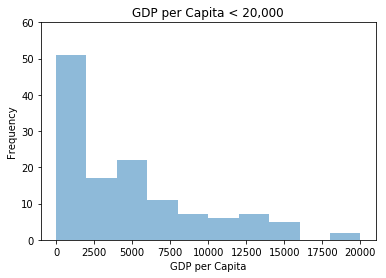

In [20]:
# Histogram for GDP per Capita < 20,000
plt.hist(df['GDP per Capita'], range=[0,20000], bins=10, alpha=0.5)
plt.title('GDP per Capita < 20,000')
plt.xlabel('GDP per Capita')
plt.ylabel('Frequency')
plt.ylim(0,60)

plt.show()

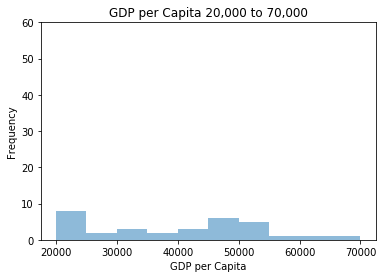

In [21]:
# Histogram for GDP per Capita between 20,000 and 70,000
plt.hist(df['GDP per Capita'], range=[20000,70000], bins=10, alpha=0.5)
plt.title('GDP per Capita 20,000 to 70,000')
plt.xlabel('GDP per Capita')
plt.ylabel('Frequency')
plt.ylim(0,60)

plt.show()

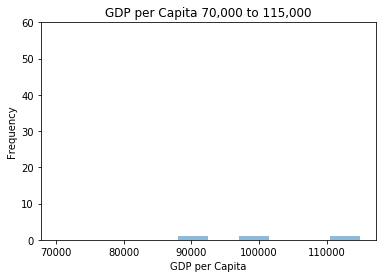

In [22]:
# Histogram for GDP per Capita between 70,000 and 115,000
plt.hist(df['GDP per Capita'], range=[70000,115000], bins=10, alpha=0.5)
plt.title('GDP per Capita 70,000 to 115,000')
plt.xlabel('GDP per Capita')
plt.ylabel('Frequency')
plt.ylim(0,60)

plt.show()

The outliers at the upper end have over $90,000 GDP per capita.
Now I just need to identify which countries these belong to (though I'd guess it is the US, China, and India.

In [31]:
for i in range(len(df['GDP per Capita'])):
    if df['GDP per Capita'] > 90000:
        print(df['GDP per Capita'][i])

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().